##### Grading Feedback Cell
88%

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Yash Pasar
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- __Do not change homework file names.__ The FAs and the professor use these names to grade your homework.  Changing file names may result in a point reduction penalty.
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include a title, and axis labels.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.

IST 718
Akshay Bhala
HW01 


In [1]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools as it

**Question 1 (10 pts)** Write a function named reverse_by_three that receives a numpy array, python list, or tuple as an input argument and starting at the 2nd from last element, returns every 3rd element of the list in reverse order.  It is legal to return an empty python list, numpy array, or tuple if the input.  Use slicing syntax exclusively to perform the operations.  Your code should be efficient as possible and not use a lot of extraneous un-needed code in the solution.

In [2]:
# Create the function reverse_by_three here
def reverse_by_three(i):
    return(i[-2::-3])  #reversing the array and returning every third element in the reverse order

In [3]:
# For grading use only (question 1)
reverse_by_three(np.array([1,2,3,4,5,6]))

array([5, 2])

##### Grading Feedback Cell

**Question 2 (10 pts)** Create a python class named my_statistics.  The my_statisitics class should require a single numpy array argument in its constructor.  Implement the following statistical methods in the my_statistics class: get_mean, get_pop_std, get_sample_std, get_min, and get_max.  The get_pop_std method shall return the standard deviation assuming the constructor argument is a complete population.  The get_sample_std method shall return the standard deviation assuming that the constructor argument is a sample of a population.  The get_min and get_max methods shall return the min and max of the constructor argument respectively.  The get_mean method shall return the mean.  Return a 'None' type if the constructor argument would cause an error for the specified operation.  Use numpy functions to perform the statistical calculations.

In [4]:
# create the my_statistics class here
# YOUR CODE HERE
class my_statistics:
    def __init__(self,x):
        self.x = np.array([x])
    def get_mean(self):
        return np.mean(self.x)
    def get_pop_std(self):
        return np.std(self.x)
    def get_sample_std(self):
        return np.std(self.x,ddof=1)
    def get_min(self):
        return np.min(self.x)
    def get_max(self):
        return np.max(self.x)
    def get_error(self):
         try:
            return np.mam(self.x)
         except AttributeError:
            print("None, the specified operation is wrong")

In [5]:
# For grading use only (question 2)
stats_data = np.array([12, 17, 9, 13, -5, -7, -9, -11, 39, 42, 17, 2, 99, 1, -310])
my_stats = my_statistics(stats_data)
print(my_stats.get_mean())
print(my_stats.get_pop_std())
print(my_stats.get_sample_std())
print(my_stats.get_min())
print(my_stats.get_max())

-6.066666666666666
85.59086140211205
88.59495847206355
-310
99


##### Grading Feedback Cell

**Question 3 (30 pts)** Create a function named monte_hall that takes as an argument the number of times to iterate a monte-carlo simulation of the Monte Hall problem with 4 doors and 1 prize.   (https://en.wikipedia.org/wiki/Monty_Hall_problem).   
For simplicity, you can assume that the game player always initially chooses door A and the host will open one door.  The prize may be behind any of the 4 doors.  The monte_hall function should print answers to the following 2 questions:  Based on the simulation, what is the probability of winning if you switch doors, and what is the probability of winning if you keep door A?  Your function should return these values in a tuple (prob_win_if_switch, prob_win_if_keep).

In [6]:
from random import shuffle, choice
def monte_hall():
    # Creating 4 doors and allocating prize "1" randomly
    doors = [1, 0, 0, 0]
    shuffle(doors)

    # 4 options to choose door
    door_selected = choice([0, 1, 2, 3])

    # Open the door that does not have the car
    non_prize_doors = list()
    for i,d in enumerate(doors):
        if d == 0 and i != door_selected: non_prize_doors.append(i)

    door_opened = choice(non_prize_doors)

    # Success if the player does not switch
    non_switch_success =  True if doors[door_selected] == 1 else False

    # Success if the player switches
    remaining_door = set([0,1,2,3]).difference([door_selected, door_opened])
    remaining_door = remaining_door.pop()
    switch_success =  True if doors[remaining_door] == 1 else False

    return non_switch_success, switch_success


def monte_carlo(n):
    non_switch_success_count = 0
    switch_success_count = 0

    for i in range(n):
        ns, ss = monte_hall()
        non_switch_success_count += ns
        switch_success_count += ss

    print(f"Number of plays: {n}")
    print(f"probability of success on switch: {switch_success_count}  {(switch_success_count/n)}")
    print(f"probability of success on non-switch: {non_switch_success_count}  {(non_switch_success_count/n)}")




In [7]:
# calling monte carlo function
monte_carlo(10000)

Number of plays: 10000
probability of success on switch: 3786  0.3786
probability of success on non-switch: 2515  0.2515


##### Grading Feedback Cell

##### **Question 4 (10 pts)** Create a numpy array containing 10,000 samples of random normal data with a mean of 5 and a variance of 4.  Plot a histogram of the data using matplotlib.

(array([  2.,   1.,   3.,   1.,   1.,   2.,   2.,  10.,  15.,  16.,  29.,
         38.,  29.,  37.,  56.,  69., 120., 153., 144., 170., 203., 270.,
        300., 302., 350., 390., 421., 476., 456., 488., 479., 521., 457.,
        475., 462., 443., 402., 348., 311., 284., 221., 212., 168., 141.,
         88.,  96., 104.,  71.,  32.,  46.,  16.,  23.,  14.,  10.,   8.,
          2.,   5.,   2.,   3.,   0.,   2.]),
 array([-2.6865664 , -2.43868966, -2.19081292, -1.94293618, -1.69505944,
        -1.4471827 , -1.19930596, -0.95142922, -0.70355248, -0.45567574,
        -0.207799  ,  0.04007774,  0.28795448,  0.53583122,  0.78370796,
         1.0315847 ,  1.27946144,  1.52733818,  1.77521492,  2.02309166,
         2.2709684 ,  2.51884514,  2.76672188,  3.01459862,  3.26247536,
         3.5103521 ,  3.75822884,  4.00610557,  4.25398231,  4.50185905,
         4.74973579,  4.99761253,  5.24548927,  5.49336601,  5.74124275,
         5.98911949,  6.23699623,  6.48487297,  6.73274971,  6.98062645,


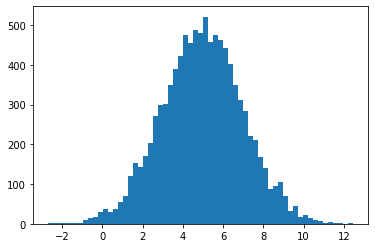

In [8]:
# your histogram plot code here
mean = 5
var = 4
stdev = np.sqrt(var)
data = np.random.normal(mean,stdev,10000)
plt.hist(data,bins="auto")


##### Grading Feedback Cell
-3 no plot title or axis labels<br>

#### Question 5 (10 pts) The below cell creates a pandas dataframe called iris_df.  Write a function named plot_iris_grid that uses matplotlib to create a grid of 16 scatter plots of all combinatations of the columns in the iris_df data frame.  For example, the first row should be sepal len vs sepal len, sepal len vs sepal width, sepal len vs petal len, sepal len vs petal width.

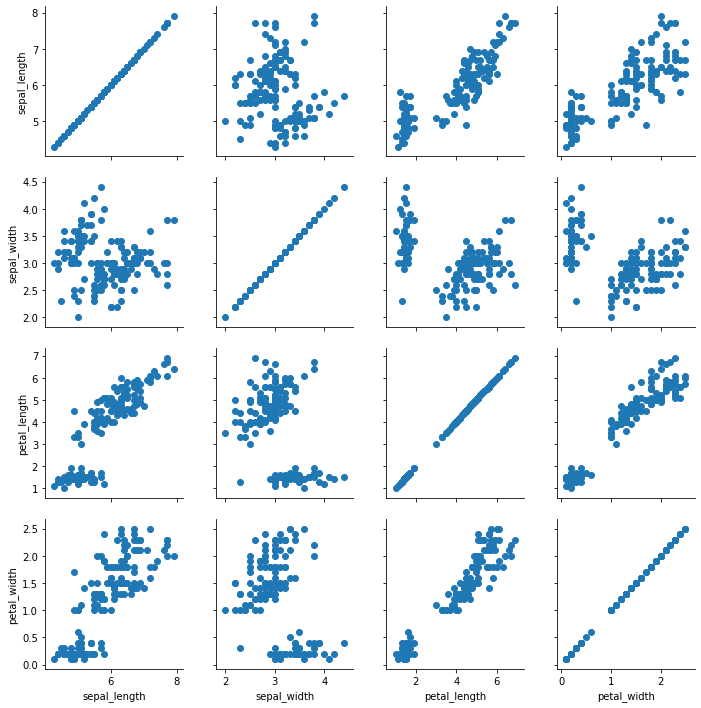

In [9]:
# plot_iris_grid code here
iris_df = sns.load_dataset("iris") # usin seaborn
def plot_iris_grid(df):
    plot = sns.PairGrid(df)
    plot = plot.map(plt.scatter)
    return plot
plot_iris_grid(iris_df)


##### Grading Feedback Cell
-3 no plot title

#### Question 6 (20 pts) Pandas

6a (4 pts): Read the supplied potholes_2016.csv file into a pandas dataframe named potholes.  Save the shape of the potholes dataframe in a variable named potholes_shape.  Display the potholes_shape variable.  Display the head of the potholes dataframe.  

In [10]:
potholes = pd.read_csv('potholes_2016.csv')
potholes_shape = potholes.shape
print(potholes_shape)
potholes.head()

(7488, 10)


,StreetNumber,StreetName,StreetNamePostType,Directional,strLocation,dtTime,streetID,VehicleName,Latitude,Longitude
0,215,COMSTOCK,AVE,,215 COMSTOCK AVE & HARRISON S,4/14/2016 8:57,12578124,DP2,-76.130140,43.044159
1,700,MIDLAND,AVE,,700-06 MIDLAND AVE & CASTLE ST W,4/15/2016 9:01,12573231,DP1,-76.154074,43.031314
2,1604,GRANT,BLVD,,1604-08 GRANT BLVD & WOODRUFF AVE,4/15/2016 13:03,12580306,DP1,-76.138284,43.072356
3,261,HOPPER,RD,,261 HOPPER RD,4/18/2016 10:39,12571704,DP2,-76.159681,42.998028
4,1821,VALLEY,DR,,1821 VALLEY DR & CHAFFEE AVE E,4/18/2016 10:52,12571710,DP2,-76.152482,42.997837


In [11]:
# for grading use only (question 6a)


##### Grading Feedback Cell

6b (4 pts): Count the total number of NAN values in the potholes dataframe and store in a variable named total_nan.  Print the total_nan variable.

In [12]:
# Your nan count code here
total_nan = potholes.isnull().sum(axis=0)
total_nan


StreetNumber          0
StreetName            0
StreetNamePostType    0
Directional           0
strLocation           0
dtTime                0
streetID              0
VehicleName           0
Latitude              0
Longitude             0
dtype: int64

In [13]:
# for grading use only (question 6b)


##### Grading Feedback Cell
-1 for presenting a column of zeros. I was expecting a single answer, which is the total of all these columns.

6c (4 pts): Count the number of unique street names in the dataframe and store in a variable named unique_street_name_count.  Print unique_street_name_count.

In [14]:
# your unique street name count here
potholes['StreetName'].nunique()

413

In [15]:
# for grading use only (question 6c)

##### Grading Feedback Cell

6d (4 pts): Use the pandas groupby feature to create a new dataframe called street_pothole_sum which summarizes the total number of potholes by street.  You are essentially counting the number of rows by street name.  The rows of street_pothole_sum should be the labeled with street name.  There should be a single column in street_pothole_sum dataframe named num_potholes.  Print the head and shape of the street_pothole_sum dataframe.

In [16]:
# street_pothole_sum code here
#num_potholes = potholes.size()
street_pothole = potholes.groupby('StreetName');
size = street_pothole.size()
street_pothole_sum = pd.DataFrame(size, columns = ['num_potholes'])
print(street_pothole_sum.head())
print(street_pothole_sum.shape)

            num_potholes
StreetName              
ACADEMY               76
ACKERMAN               5
ADAMS                 17
AINSLEY                7
ALANSON                4
(413, 1)


In [17]:
# for grading use only (question 6d)

##### Grading Feedback Cell

6e (4 pts) Save the number of potholes on Comstock Ave in a variable named num_potholes_comstock and display the variable. The num_potholes_comstock variable should be an integer type.  Print num_potholes_comstock.

In [23]:
# num_potholes_comstock code here
num_potholes_comstock = street_pothole_sum.loc['COMSTOCK ']
num_potholes_comstock

num_potholes    10
Name: COMSTOCK , dtype: int64

In [19]:
# for grading use only (question 6e)

##### Grading Feedback Cell
-2 incorrect type

#### Question 7 (10 pts): Create a function named my_corr_coef that takes as input 2 numpy single dimensional arrays and returns the correlation coefficient to the caller.  Note that your function does not have to work for matrices.  The correlation coefficient is a number of type float between -1 and 1.  The my_corr_coef function should not use any built in numpy functions to calculate the correlation.  For example, don't use the built in numpy corrcoef function, don't use np.mean, etc.  Make sure to check for input error conditions and return the Python 'None' type if the correlation coefficient cannot be computed due to problems with the input data.  See [equation 3](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a reference on how to compute correlation.

In [20]:
# my_corr_coef here
def my_corr_coef(x , y):
    try:
        raise IOError('HiThere')
    except IOError:
        print('None')

    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(map(lambda x: pow(x, 2), x))
    sum_y_sq = sum(map(lambda x: pow(x, 2), y))
    psum = sum(map(lambda x, y: x * y, x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    if den == 0: return 0
    return num / den 
    

In [21]:
# for grading use only (question 7)
a = np.array([1,2,3,4,6,7,8,9])
b = np.array([2,4,6,8,10,12,13,15])
my_corr_coef(a,b)

None


0.9953500135553002

##### Grading Feedback Cell
-3 for not returning a None type when there the list a & b are empty